In [16]:
import pandas as pd, matplotlib.pyplot as plt, os

In [17]:
data = pd.read_excel("Routes\Flushing_to_Manhattan.xlsx")

<>:1: SyntaxWarning: invalid escape sequence '\F'
<>:1: SyntaxWarning: invalid escape sequence '\F'
C:\Users\Jared\AppData\Local\Temp\ipykernel_9156\2886536320.py:1: SyntaxWarning: invalid escape sequence '\F'
  data = pd.read_excel("Routes\Flushing_to_Manhattan.xlsx")


DATA Transformations

In [18]:

# Transform the "Date" column to show only "MM-DD" format
data['Date'] = pd.to_datetime(data['Date'], format='%Y-%m-%d').dt.strftime('%m-%d')

# Transform the "Time of Day" column to 12-hour format with AM/PM indication, rounded down to the nearest hour
data['Time of Day'] = pd.to_datetime(data['Time of Day'], format='%H:%M:%S').dt.floor('H').dt.strftime('%I:%M %p')


C:\Users\Jared\AppData\Local\Temp\ipykernel_9156\1632637538.py:5: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  data['Time of Day'] = pd.to_datetime(data['Time of Day'], format='%H:%M:%S').dt.floor('H').dt.strftime('%I:%M %p')


In [19]:
import re

# Function to transform "Travel Time" into total minutes
def convert_travel_time_to_minutes(travel_time):
    # Initialize total minutes
    total_minutes = 0
    
    # Check for "hour" and extract hours
    hours_match = re.search(r'(\d+)\s*hour', travel_time)
    if hours_match:
        total_minutes += int(hours_match.group(1)) * 60
    
    # Check for "mins" and extract minutes
    minutes_match = re.search(r'(\d+)\s*mins', travel_time)
    if minutes_match:
        total_minutes += int(minutes_match.group(1))
    
    return total_minutes

# Apply the transformation to the "Travel Time" column
data['Travel Time'] = data['Travel Time'].apply(convert_travel_time_to_minutes)

# Remove duplicates for each "Date" and "Time of Day", keeping the last occurrence
data['Date'] = data['Date'].astype(str)  # Ensure "Date" is treated as a string
data['Time of Day'] = data['Time of Day'].astype(str)  # Ensure "Time of Day" is treated as a string

# Drop duplicate records based on "Date" and "Time of Day"
data = data.drop_duplicates(subset=['Date', 'Time of Day'], keep='last')

GRAPHING

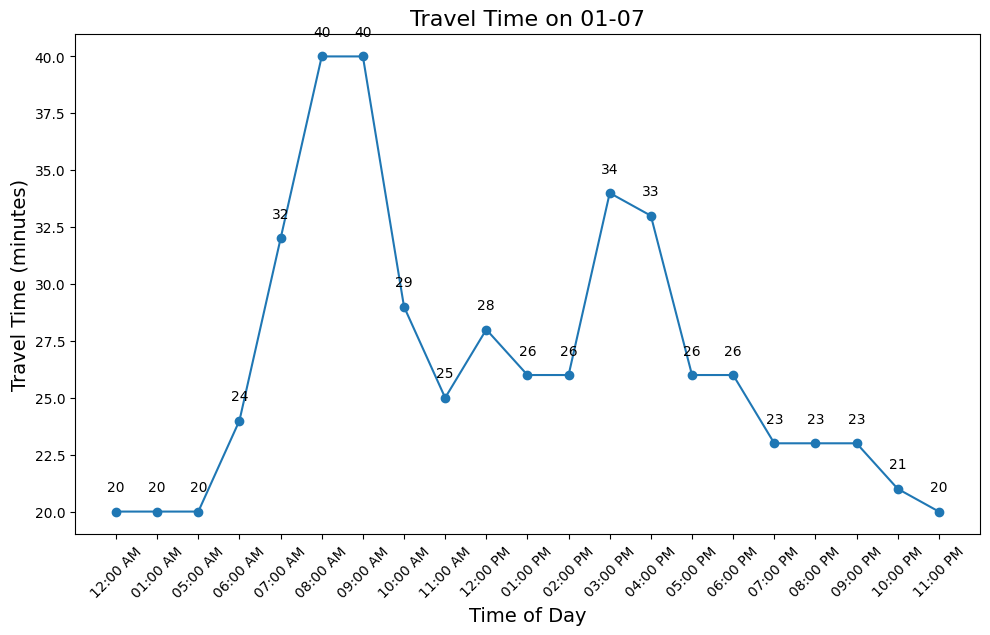

In [20]:
# Filter data for the specific date "01-07"
filtered_data = data[data['Date'] == '01-07']

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(filtered_data['Time of Day'], filtered_data['Travel Time'], marker='o', linestyle='-')

# Display y-values at every data point
for x, y in zip(filtered_data['Time of Day'], filtered_data['Travel Time']):
    plt.text(x, y+.75, f'{y}', fontsize=10, ha='center', va='bottom')

# Customize the plot
plt.title('Travel Time on 01-07', fontsize=16)
plt.xlabel('Time of Day', fontsize=14)
plt.ylabel('Travel Time (minutes)', fontsize=14)
plt.xticks(rotation=45)

# Remove gridlines
plt.grid(False)

# Show the plot
plt.tight_layout()
spacing = .1
plt.subplots_adjust(bottom=spacing)
plt.show()

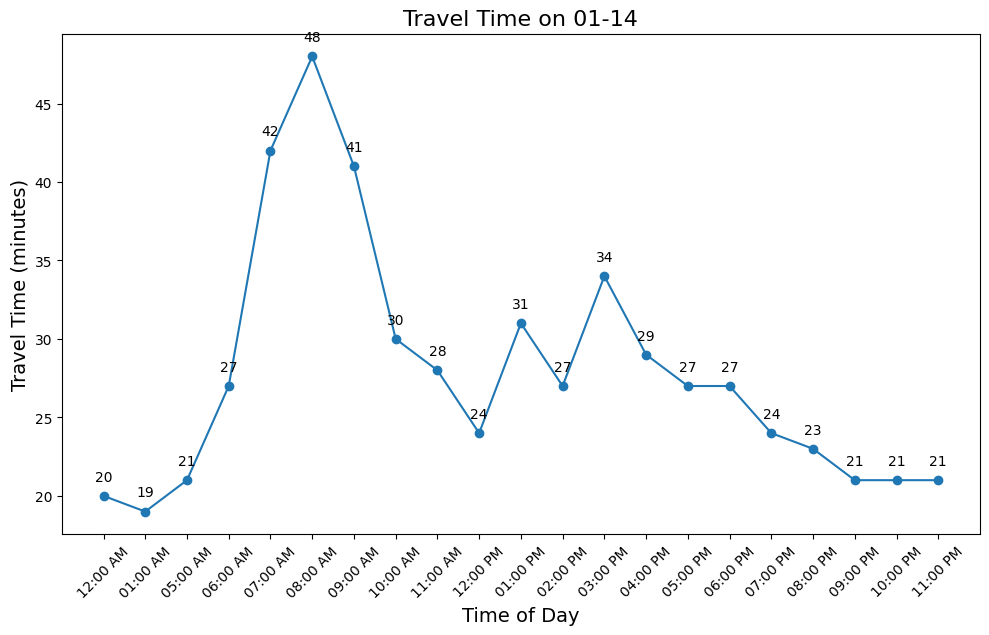

In [21]:
# Filter data for the specific date "01-14"
filtered_data = data[data['Date'] == '01-14']

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(filtered_data['Time of Day'], filtered_data['Travel Time'], marker='o', linestyle='-')

# Display y-values at every data point
for x, y in zip(filtered_data['Time of Day'], filtered_data['Travel Time']):
    plt.text(x, y+.75, f'{y}', fontsize=10, ha='center', va='bottom')

# Customize the plot
plt.title('Travel Time on 01-14', fontsize=16)
plt.xlabel('Time of Day', fontsize=14)
plt.ylabel('Travel Time (minutes)', fontsize=14)
plt.xticks(rotation=45)

# Remove gridlines
plt.grid(False)

# Show the plot
plt.tight_layout()
spacing = .1
plt.subplots_adjust(bottom=spacing)
plt.show()



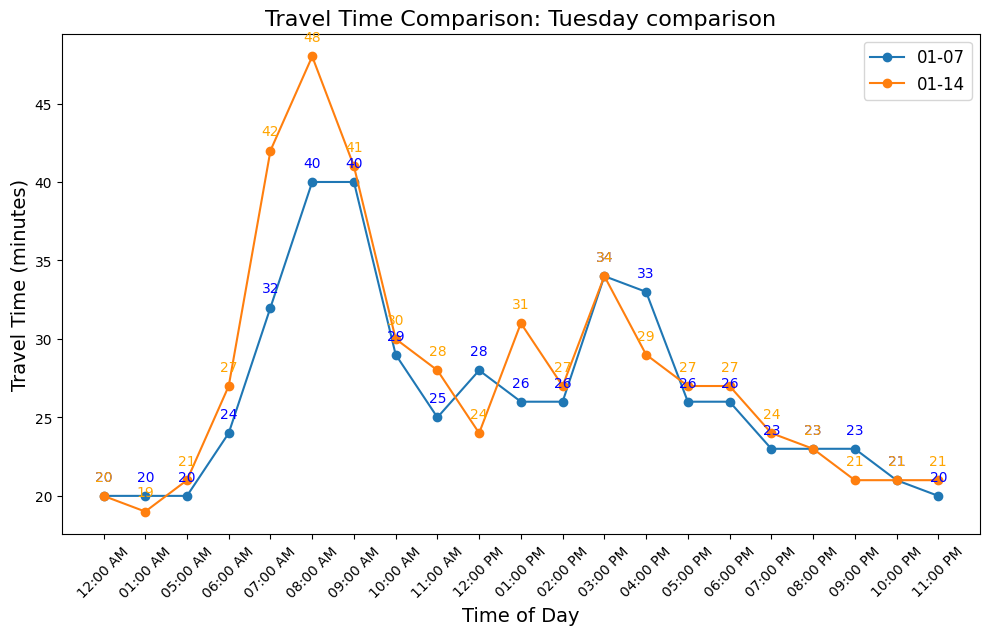

In [22]:
# Filter data for the specific dates "01-07" and "01-14"
data_01_07 = data[data['Date'] == '01-07']
data_01_14 = data[data['Date'] == '01-14']

# Plot the data
plt.figure(figsize=(10, 6))

# Plot for 01-07
plt.plot(data_01_07['Time of Day'], data_01_07['Travel Time'], marker='o', linestyle='-', label='01-07')
for x, y in zip(data_01_07['Time of Day'], data_01_07['Travel Time']):
   plt.text(x, y + 0.75, f'{y}', fontsize=10, ha='center', va='bottom', color='blue')

# Plot for 01-14
plt.plot(data_01_14['Time of Day'], data_01_14['Travel Time'], marker='o', linestyle='-', label='01-14')
for x, y in zip(data_01_14['Time of Day'], data_01_14['Travel Time']):
   plt.text(x, y + 0.75, f'{y}', fontsize=10, ha='center', va='bottom', color='orange')

# Customize the plot
plt.title('Travel Time Comparison: Tuesday comparison', fontsize=16)
plt.xlabel('Time of Day', fontsize=14)
plt.ylabel('Travel Time (minutes)', fontsize=14)
plt.xticks(rotation=45)

# Remove gridlines
plt.grid(False)

# Add a legend to distinguish the lines
plt.legend(fontsize=12)

# Adjust subplot spacing
plt.tight_layout()
spacing = 0.1
plt.subplots_adjust(bottom=spacing)

# Show the plot
plt.show()


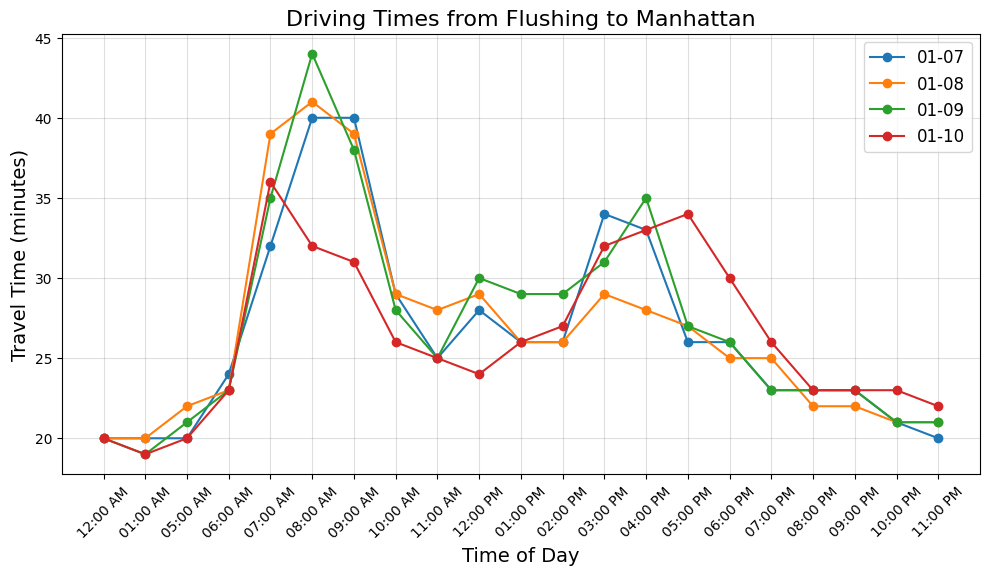

In [23]:
# Filter data for the specific dates 01-07 to 01-10
filtered_dates = ['01-07', '01-08', '01-09', '01-10']
data_filtered = data[data['Date'].isin(filtered_dates)]

# Plot the data
plt.figure(figsize=(10, 6))

for date in filtered_dates:
    # Filter data for each specific date
    daily_data = data_filtered[data_filtered['Date'] == date]
    plt.plot(daily_data['Time of Day'], daily_data['Travel Time'], marker='o', linestyle='-', label=date)

# Customize the plot
plt.title('Driving Times from Flushing to Manhattan', fontsize=16)
plt.xlabel('Time of Day', fontsize=14)
plt.ylabel('Travel Time (minutes)', fontsize=14)
plt.xticks(rotation=45)

# Remove gridlines
plt.grid(True)
plt.grid(color = 'gray', alpha=0.25)

# Add a legend to distinguish the lines
plt.legend(fontsize=12)

# Adjust subplot spacing
plt.tight_layout()
plt.subplots_adjust(bottom=0.2)

# Show the plot
plt.show()


ALL WEEKDAYS ALL TIMES

Answers what time of day is the best to travel?

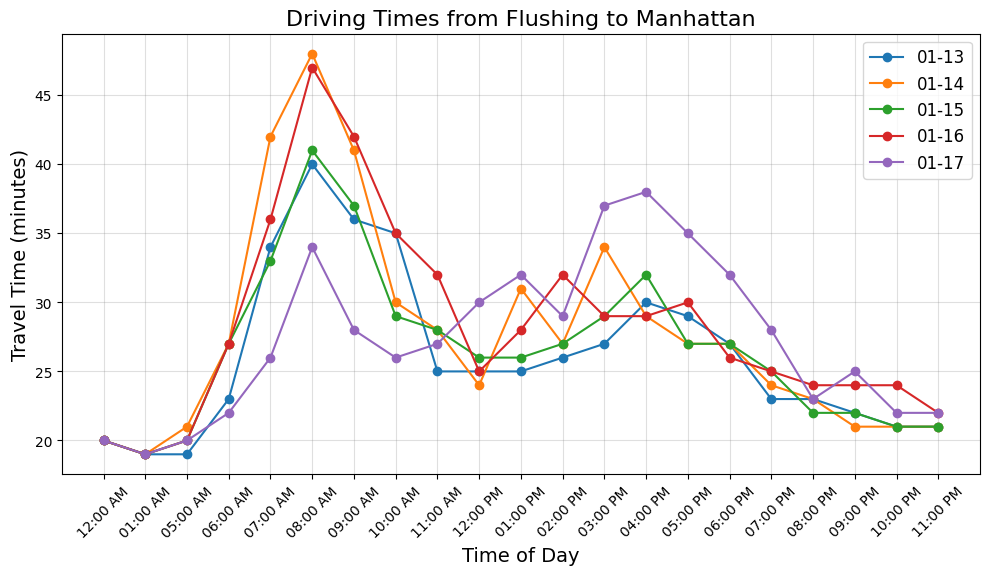

In [24]:
# Filter data for the specific dates 01-07 to 01-10
filtered_dates = ['01-13', '01-14', '01-15', '01-16','01-17']
data_filtered = data[data['Date'].isin(filtered_dates)]

# Plot the data
plt.figure(figsize=(10, 6))

for date in filtered_dates:
    # Filter data for each specific date
    daily_data = data_filtered[data_filtered['Date'] == date]
    plt.plot(daily_data['Time of Day'], daily_data['Travel Time'], marker='o', linestyle='-', label=date)

# Customize the plot
plt.title('Driving Times from Flushing to Manhattan', fontsize=16)
plt.xlabel('Time of Day', fontsize=14)
plt.ylabel('Travel Time (minutes)', fontsize=14)
plt.xticks(rotation=45)

# Remove gridlines
plt.grid(True)
plt.grid(color = 'gray', alpha=0.25)

# Add a legend to distinguish the lines
plt.legend(fontsize=12)

# Adjust subplot spacing
plt.tight_layout()
plt.subplots_adjust(bottom=0.2)

# Show the plot
plt.show()


WEEKENDS

Answers what time of day is the best to travel?

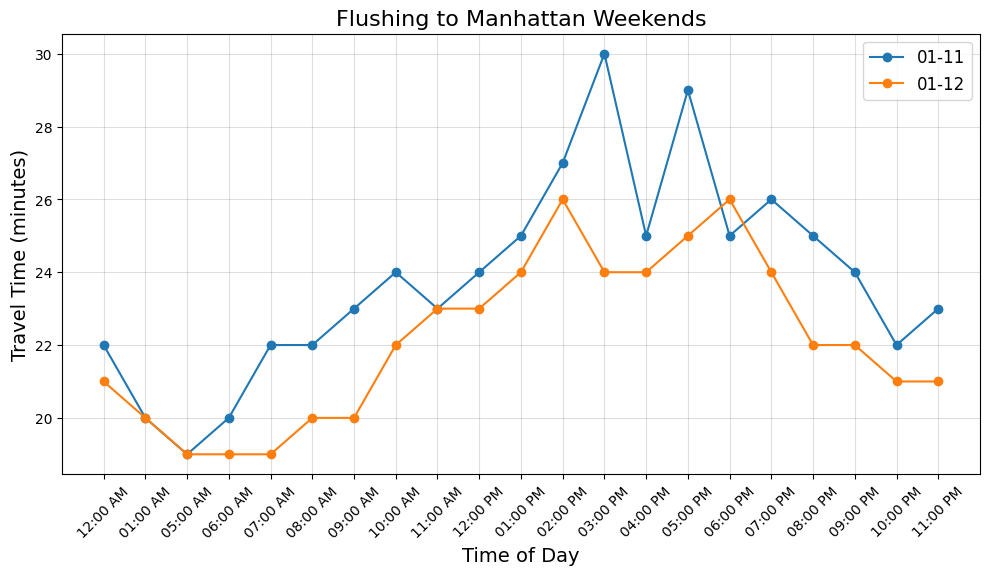

In [25]:
# Filter data for the specific dates 01-07 to 01-10
filtered_dates = ['01-11', '01-12']
data_filtered = data[data['Date'].isin(filtered_dates)]

# Plot the data
plt.figure(figsize=(10, 6))

for date in filtered_dates:
    # Filter data for each specific date
    daily_data = data_filtered[data_filtered['Date'] == date]
    plt.plot(daily_data['Time of Day'], daily_data['Travel Time'], marker='o', linestyle='-', label=date)

# Customize the plot
plt.title('Flushing to Manhattan Weekends', fontsize=16)
plt.xlabel('Time of Day', fontsize=14)
plt.ylabel('Travel Time (minutes)', fontsize=14)
plt.xticks(rotation=45)

# Remove gridlines
plt.grid(True)
plt.grid(color = 'gray', alpha=0.25)

# Add a legend to distinguish the lines
plt.legend(fontsize=12)

# Adjust subplot spacing
plt.tight_layout()
plt.subplots_adjust(bottom=0.2)

# Show the plot
plt.show()


WEEK DAYS Only Rush Hour

In [26]:
# Convert "Time of Day" to datetime for proper filtering
data['Time of Day'] = pd.to_datetime(data['Time of Day'], format='%I:%M %p')

# Filter data for the specific dates 01-13 to 01-17
filtered_dates = ['01-13', '01-14', '01-15', '01-16', '01-17']
data_filtered = data[data['Date'].isin(filtered_dates)]

# Define the time ranges to filter (6 AM to 10 AM and 3 PM to 7 PM)
time_ranges = [('06:00 AM', '10:00 AM'), ('03:00 PM', '07:00 PM')]

# Filter the data for the specific time ranges
filtered_data = pd.concat([
    data_filtered[(data_filtered['Time of Day'] >= pd.to_datetime(start, format='%I:%M %p')) &
                  (data_filtered['Time of Day'] <= pd.to_datetime(end, format='%I:%M %p'))]
    for start, end in time_ranges
])

# Verify the number of data points per day
filtered_data['Date'] = filtered_data['Date'].astype(str)  # Ensure Date is treated as a string
grouped = filtered_data.groupby('Date')

# Check for 10 data points per day and remove excess or duplicates
valid_data = grouped.filter(lambda x: len(x) == 10)

# Recalculate total and average travel times
total_travel_time = valid_data['Travel Time'].sum()
average_travel_time = total_travel_time / 50  # Fixed divisor because we expect 50 data points

print(f"Total Travel Time: {total_travel_time} minutes")
print(f"Average Travel Time: {average_travel_time:.2f} minutes")


Total Travel Time: 1572 minutes
Average Travel Time: 31.44 minutes


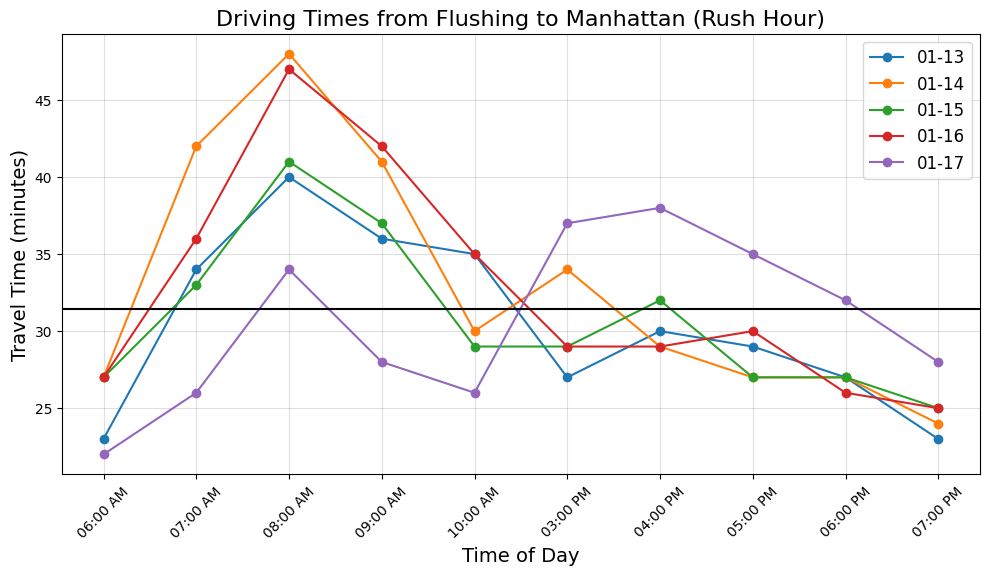

In [28]:
# Define the time ranges to filter (6 AM to 10 AM and 3 PM to 7 PM)
time_ranges = [('06:00 AM', '10:00 AM'), ('03:00 PM', '07:00 PM')]

# Convert "Time of Day" to datetime for filtering
data['Time of Day'] = pd.to_datetime(data['Time of Day'], format='%I:%M %p')

# Filter data for the specific dates 01-13 to 01-17
filtered_dates = ['01-13', '01-14', '01-15', '01-16', '01-17']
data_filtered = data[data['Date'].isin(filtered_dates)]

# Filter data for the specified time ranges
filtered_data = pd.concat([
    data_filtered[(data_filtered['Time of Day'] >= pd.to_datetime(start, format='%I:%M %p')) &
                  (data_filtered['Time of Day'] <= pd.to_datetime(end, format='%I:%M %p'))]
    for start, end in time_ranges
])

# Plot the data
plt.figure(figsize=(10, 6))

for date in filtered_dates:
    # Filter data for each specific date
    daily_data = filtered_data[filtered_data['Date'] == date]
    plt.plot(daily_data['Time of Day'].dt.strftime('%I:%M %p'), daily_data['Travel Time'], marker='o', linestyle='-', label=date)

# Customize the plot
plt.title('Driving Times from Flushing to Manhattan (Rush Hour)', fontsize=16)
plt.xlabel('Time of Day', fontsize=14)
plt.ylabel('Travel Time (minutes)', fontsize=14)
plt.xticks(rotation=45)

# Add gridlines with custom styling
plt.grid(color='gray', alpha=0.25)

# Add a legend to distinguish the lines
plt.legend(fontsize=12)

# Adjust subplot spacing
plt.tight_layout()
plt.subplots_adjust(bottom=0.2)

# Add a horizontal line at the average travel time
plt.axhline(y=average_travel_time, color='black', linestyle='-', label=f'Average Travel Time ({average_travel_time:.2f} min)')

# Show the plot
plt.show()
# Add a horizontal line at y = 3

